# Proyecto PixelSounds

In [1]:
import imagen2audio as i2a
import cv2
import os
import numpy as np
import warnings
import scipy.fftpack as fft
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, median_filter
from scipy import signal
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import vozyaudio as vz

In [2]:
img = "images/patxirisu.jpg"

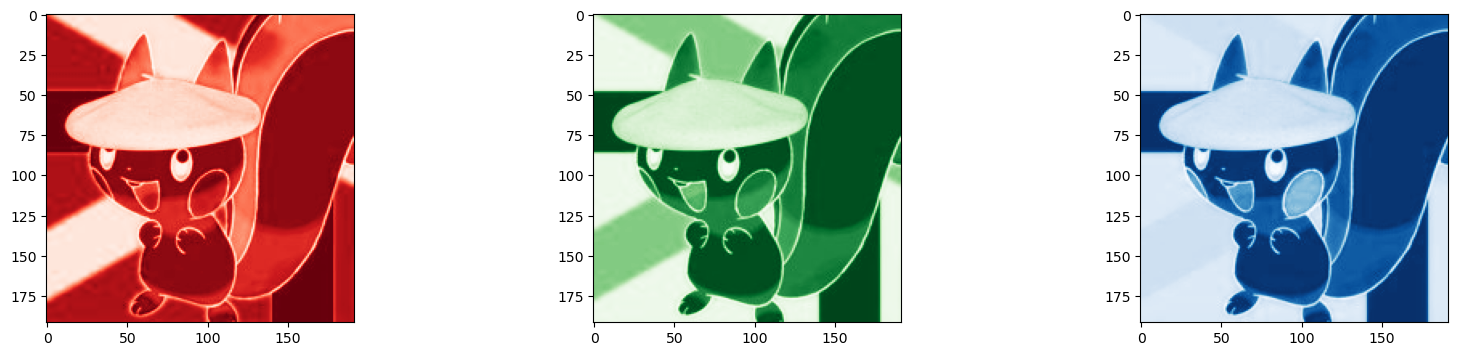

In [3]:
R, G, B = i2a.extract_rgb(img)

plt.figure(figsize=(20, 4))
plt.subplot(131)
_ = plt.imshow(R, cmap="Reds")
plt.subplot(132)
_ = plt.imshow(G, cmap="Greens")
plt.subplot(133)
_ = plt.imshow(B, cmap="Blues")

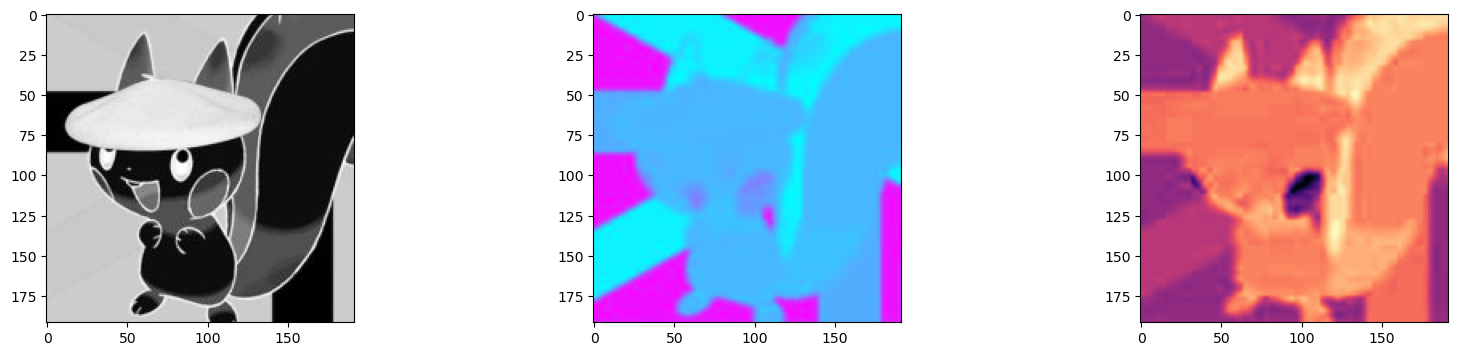

In [4]:
Y, cB, cR = i2a.extract_ycbcr(img)
plt.figure(figsize=(20, 4))
plt.subplot(131)
_ = plt.imshow(Y, cmap="Greys")
plt.subplot(132)
_ = plt.imshow(cB, cmap="cool")
plt.subplot(133)
_ = plt.imshow(cR, cmap="magma")

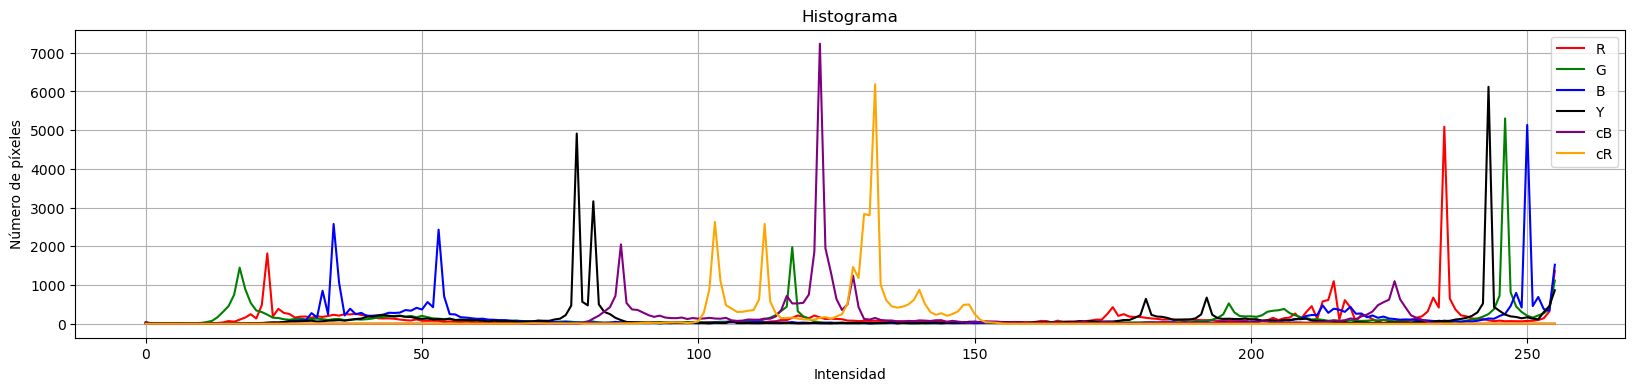

In [5]:
hist_r = i2a.histograma(R)
hist_g = i2a.histograma(G)
hist_b = i2a.histograma(B)
hist_y = i2a.histograma(Y)
hist_cb = i2a.histograma(cB)
hist_cr = i2a.histograma(cR)

intensidad = range(0,256)
plt.figure(figsize=(20, 4))
plt.plot(intensidad,hist_r,"r",label="R")
plt.plot(intensidad,hist_g,"g",label="G")
plt.plot(intensidad,hist_b,"b",label="B")
plt.plot(intensidad,hist_y,"k",label="Y")
plt.plot(intensidad,hist_cb,"purple",label="cB")
plt.plot(intensidad,hist_cr,"orange",label="cR")
plt.title('Histograma')
plt.xlabel('Intensidad')
plt.ylabel('Número de píxeles')
plt.legend(loc="upper right")
plt.grid()
plt.show()

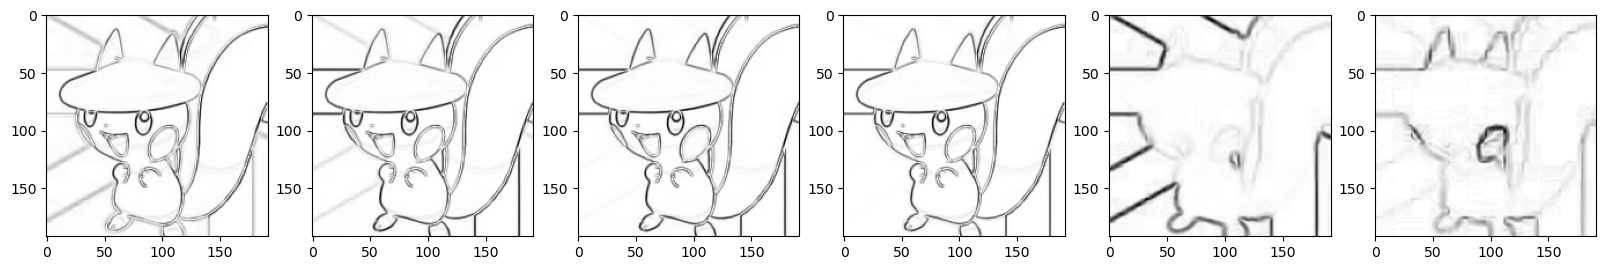

In [6]:
gradiente_r = i2a.gradiente(R)
gradiente_g = i2a.gradiente(G)
gradiente_b = i2a.gradiente(B)
gradiente_y = i2a.gradiente(Y)
gradiente_cb = i2a.gradiente(cB)
gradiente_cr = i2a.gradiente(cR)

plt.figure(figsize=(20, 7))
plt.subplot(161)
_ = plt.imshow(gradiente_r, cmap="Greys")
plt.subplot(162)
_ = plt.imshow(gradiente_g, cmap="Greys")
plt.subplot(163)
_ = plt.imshow(gradiente_b, cmap="Greys")
plt.subplot(164)
_ = plt.imshow(gradiente_y, cmap="Greys")
plt.subplot(165)
_ = plt.imshow(gradiente_cb, cmap="Greys")
plt.subplot(166)
_ = plt.imshow(gradiente_cr, cmap="Greys")

In [7]:
entropia_r = i2a.entropia(R)
entropia_g = i2a.entropia(G)
entropia_b = i2a.entropia(B)
entropia_y = i2a.entropia(Y)
entropia_cb = i2a.entropia(cB)
entropia_cr = i2a.entropia(cR)

print("Entropia del canal R =",entropia_r)
print("Entropia del canal G =",entropia_g)
print("Entropia del canal B =",entropia_b)
print("Entropia del canal Y =",entropia_y)
print("Entropia del canal cB =",entropia_cb)
print("Entropia del canal cR =",entropia_cr)

Entropia del canal R = 6.7836065
Entropia del canal G = 6.600799
Entropia del canal B = 6.2188635
Entropia del canal Y = 5.9546037
Entropia del canal cB = 5.5754786
Entropia del canal cR = 4.9126306


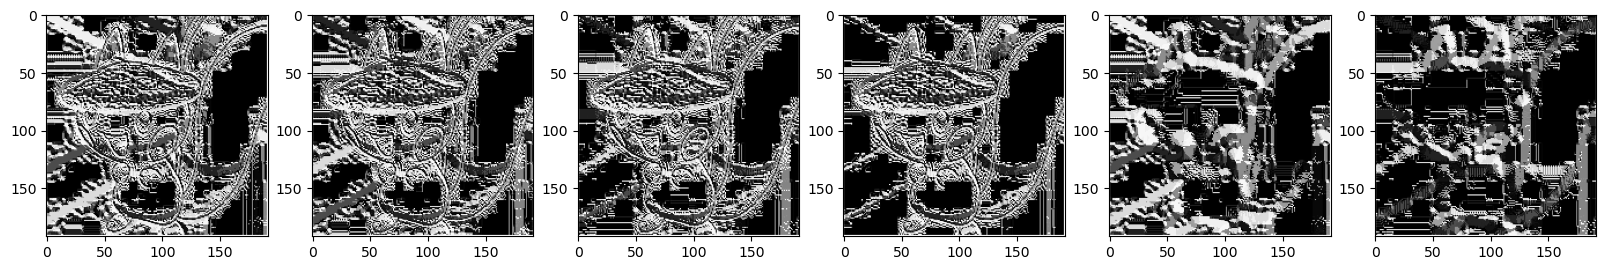

In [8]:
LBP_r = i2a.LBP(R)
LBP_g = i2a.LBP(G)
LBP_b = i2a.LBP(B)
LBP_y = i2a.LBP(Y)
LBP_cb = i2a.LBP(cB)
LBP_cr = i2a.LBP(cR)

plt.figure(figsize=(20, 7))
plt.subplot(161)
_ = plt.imshow(LBP_r, cmap="Greys")
plt.subplot(162)
_ = plt.imshow(LBP_g, cmap="Greys")
plt.subplot(163)
_ = plt.imshow(LBP_b, cmap="Greys")
plt.subplot(164)
_ = plt.imshow(LBP_y, cmap="Greys")
plt.subplot(165)
_ = plt.imshow(LBP_cb, cmap="Greys")
plt.subplot(166)
_ = plt.imshow(LBP_cr, cmap="Greys")

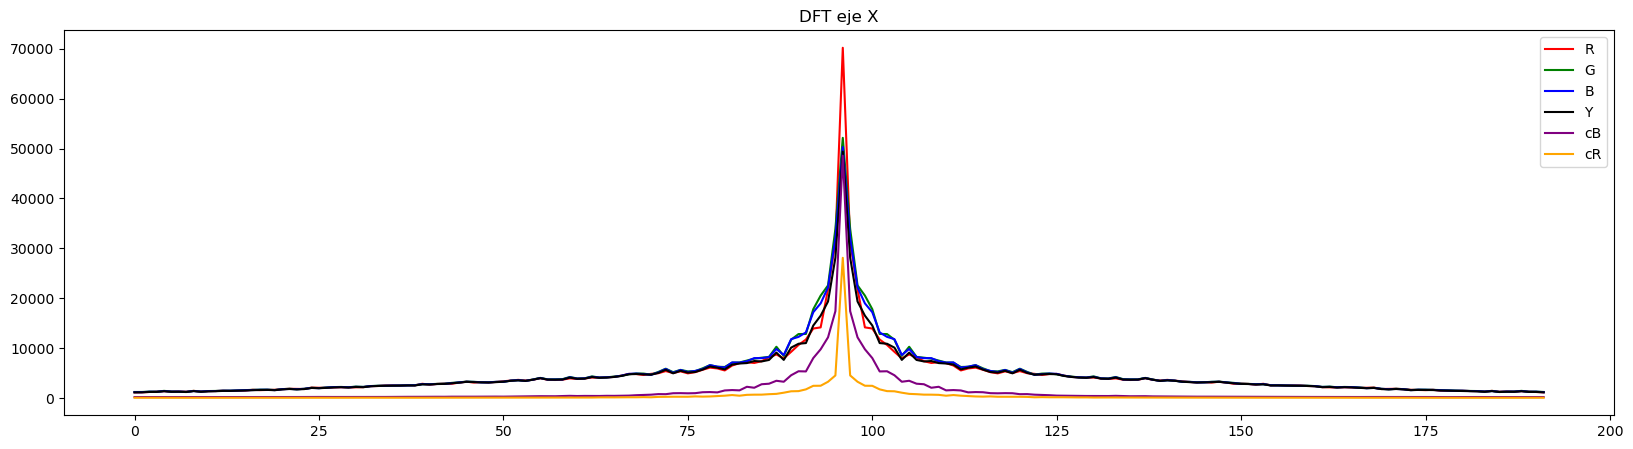

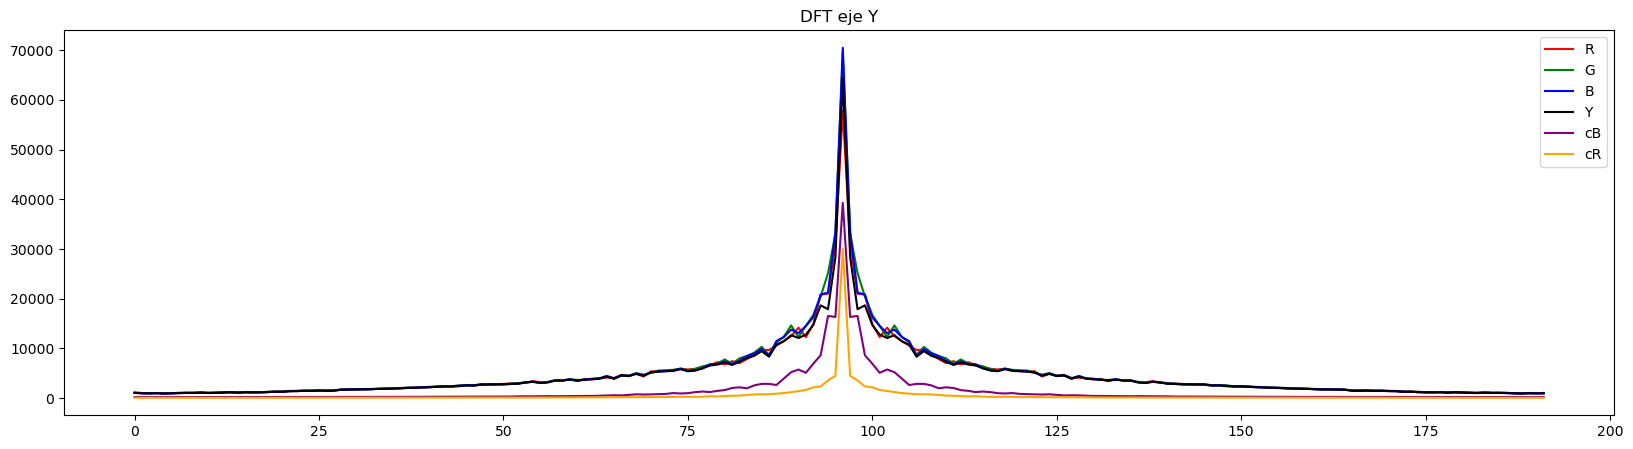

In [31]:
dft_x_r, dft_y_r = i2a.DFT_img(R)
dft_x_g, dft_y_g = i2a.DFT_img(G)
dft_x_b, dft_y_b = i2a.DFT_img(B)
dft_x_y, dft_y_y = i2a.DFT_img(Y)
dft_x_cb, dft_y_cb = i2a.DFT_img(cB)
dft_x_cr, dft_y_cr = i2a.DFT_img(cR)

plt.figure(figsize=(20, 5))
plt.plot(dft_x_r,"r",label="R")
plt.plot(dft_x_g,"g",label="G")
plt.plot(dft_x_b,"b",label="B")
plt.plot(dft_x_y,"k",label="Y")
plt.plot(dft_x_cb,"purple",label="cB")
plt.plot(dft_x_cr,"orange",label="cR")
plt.title('DFT eje X')
plt.legend()

plt.figure(figsize=(20, 5))
plt.plot(dft_y_r,"r",label="R")
plt.plot(dft_y_g,"g",label="G")
plt.plot(dft_y_b,"b",label="B")
plt.plot(dft_y_y,"k",label="Y")
plt.plot(dft_y_cb,"purple",label="cB")
plt.plot(dft_y_cr,"orange",label="cR")
plt.title('DFT eje Y')
plt.legend()

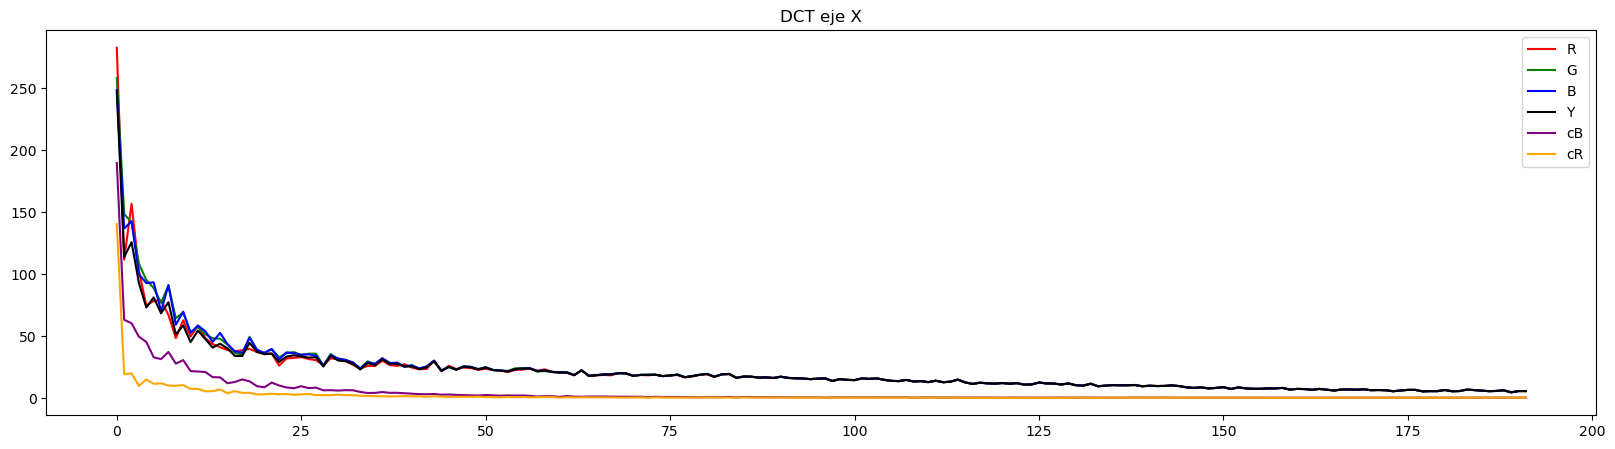

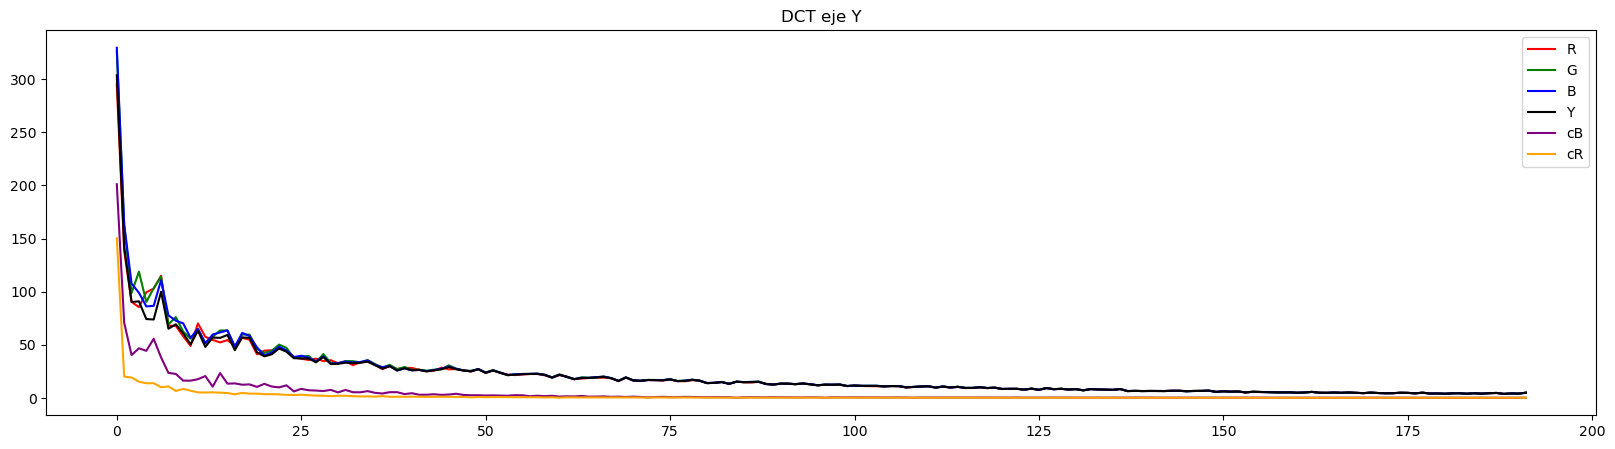

In [20]:
dct_x_r, dct_y_r = i2a.DCT_img(R)
dct_x_g, dct_y_g = i2a.DCT_img(G)
dct_x_b, dct_y_b = i2a.DCT_img(B)
dct_x_y, dct_y_y = i2a.DCT_img(Y)
dct_x_cb, dct_y_cb = i2a.DCT_img(cB)
dct_x_cr, dct_y_cr = i2a.DCT_img(cR)

plt.figure(figsize=(20, 5))
plt.plot(dct_x_r,"r",label="R")
plt.plot(dct_x_g,"g",label="G")
plt.plot(dct_x_b,"b",label="B")
plt.plot(dct_x_y,"k",label="Y")
plt.plot(dct_x_cb,"purple",label="cB")
plt.plot(dct_x_cr,"orange",label="cR")
plt.title('DCT eje X')
plt.legend()

plt.figure(figsize=(20, 5))
plt.plot(dct_y_r,"r",label="R")
plt.plot(dct_y_g,"g",label="G")
plt.plot(dct_y_b,"b",label="B")
plt.plot(dct_y_y,"k",label="Y")
plt.plot(dct_y_cb,"purple",label="cB")
plt.plot(dct_y_cr,"orange",label="cR")
plt.title('DCT eje Y')
plt.legend()

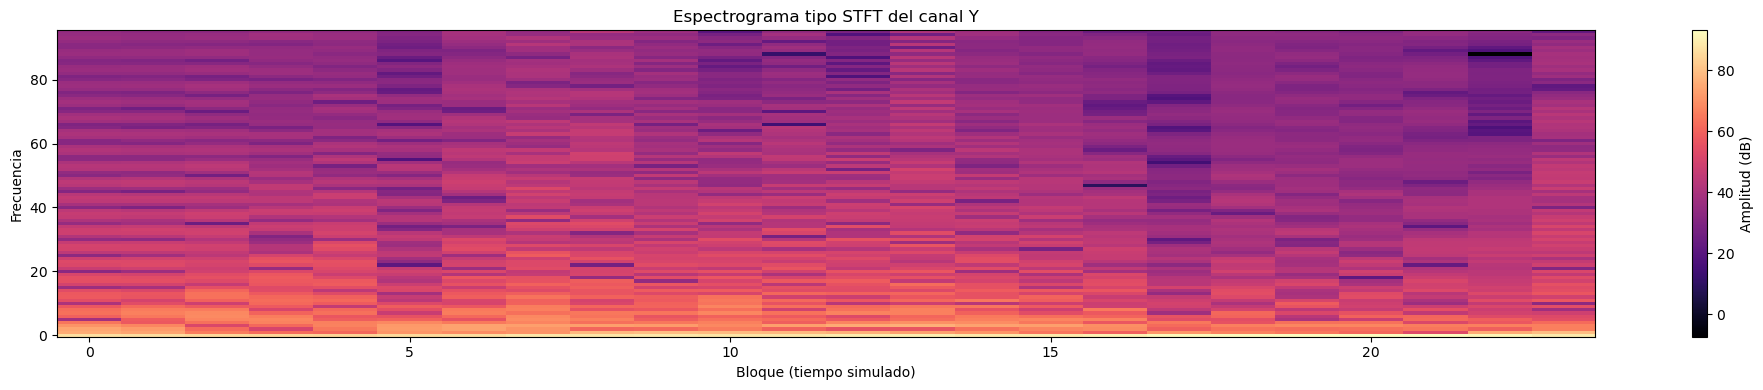

In [33]:
spec_y = i2a.espectrograma_por_bloques(Y, block_size=4)

specdb_y = i2a.espectrograma_por_bloques(Y, block_size=8,return_db=True)
plt.figure(figsize=(20, 4))
plt.imshow(specdb_y, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(label='Amplitud (dB)')
plt.xlabel('Bloque (tiempo simulado)')
plt.ylabel('Frecuencia')
plt.title('Espectrograma tipo STFT del canal Y')
plt.tight_layout()
plt.show()

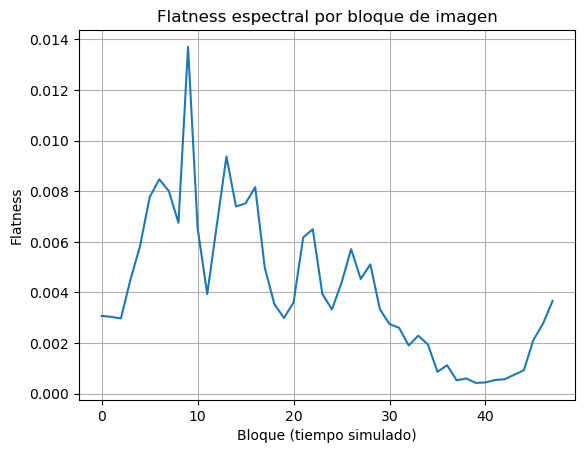

In [28]:
flatness = i2a.flatness(spec_y)

plt.plot(flatness[0])
plt.title("Flatness espectral por bloque de imagen")
plt.xlabel("Bloque (tiempo simulado)")
plt.ylabel("Flatness")
plt.grid()
plt.show()

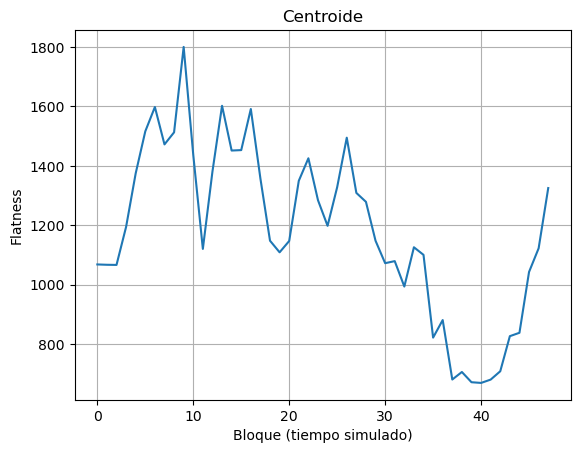

In [30]:
centroide = i2a.centroide(spec_y)
plt.plot(centroide[0])
plt.title("Centroide")
plt.xlabel("Bloque (tiempo simulado)")
plt.ylabel("Flatness")
plt.grid()
plt.show()